In [122]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from threading import Thread

pd.options.display.expand_frame_repr = False
def nunique(eh2):
    nunique = [0 for i in eh2.columns]
    notnasum = []
    dtypes = []
    isnapercent = []

    def fnunique(eh2, column, i, nunique):
        nunique[i] = eh2[column].nunique()
    def fnotnasum(eh2, notnasum):
        notnasum.append(eh2.notna().sum())
    def fisnapercent(eh2, isnapercent):
        isnapercent.append(eh2.isna().sum() / len(eh2))
    def fdtypes(eh2, dtypes):
        dtypes.append(eh2.dtypes)

    t1 = []
    i = 0
    for column in eh2.columns:
        t1.append(Thread(target=fnunique, args=(eh2, column, i, nunique)))
        i += 1
    t2 = Thread(target=fnotnasum, args=(eh2, notnasum))
    t3 = Thread(target=fdtypes, args=(eh2, dtypes))
    t4 = Thread(target=fisnapercent, args=(eh2, isnapercent))

    for tr in t1:
        tr.start()
    t2.start()
    t3.start()
    t4.start()

    t3.join()
    #print(dtypes)
    t4.join()
    #print(isnasum)
    t2.join()
    #print(notnasum)
    #i = 0
    for tr in t1:
        tr.join()
        #print(nunique[i])
        #i += 1

    return pd.concat([pd.Series(nunique, index=eh2.columns),
                      notnasum[0],
                      isnapercent[0],
                      dtypes[0]
                     ], axis=1,
                     keys=['nunique', 'Number of not NaN', 'Percent of NaN', 'Type'])

In [123]:
df = pd.read_csv("latest.csv")
del df['Unnamed: 0']
df = df.drop_duplicates()

In [124]:
nunique(df)

,nunique,Number of not NaN,Percent of NaN,Type
Name,15766,17089,0.000000,object
Score rank,14799,15321,0.103458,float64
Popularity rank,14605,17089,0.000000,int64
Score,531,12011,0.297150,float64
Episodes,192,16612,0.027913,float64
Type,7,17089,0.000000,object
Link,15769,17089,0.000000,object
Premiered,232,4805,0.718825,object
English name,5986,6727,0.606355,object
Japanese name,15094,17043,0.002692,object


In [125]:
df = df.loc[df['Members Total'] > 100000]
# df = df.loc[df['Members Favorites'] > 5000]

In [126]:
df

,Name,Score rank,Popularity rank,Score,Episodes,Type,Link,Premiered,English name,Japanese name,...,Members score 10,Members score 9,Members score 8,Members score 7,Members score 6,Members score 5,Members score 4,Members score 3,Members score 2,Members score 1
0,Fullmetal Alchemist: Brotherhood,1.0,3,9.17,64.0,TV,https://myanimelist.net/anime/5114/Fullmetal_A...,Spring 2009,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,...,766948.0,435910.0,217701.0,77068.0,22249.0,10285.0,3601.0,1707.0,2292.0,18197.0
1,Shingeki no Kyojin Season 3 Part 2,2.0,45,9.11,10.0,TV,https://myanimelist.net/anime/38524/Shingeki_n...,Spring 2019,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,...,419221.0,302094.0,139059.0,42323.0,10533.0,3689.0,1411.0,703.0,530.0,6059.0
2,Steins;Gate,3.0,10,9.10,24.0,TV,https://myanimelist.net/anime/9253/Steins_Gate,Spring 2011,Steins;Gate,STEINS;GATE,...,499900.0,297881.0,152722.0,62782.0,23231.0,12093.0,5571.0,2565.0,1945.0,5912.0
3,Gintama°,4.0,336,9.09,51.0,TV,https://myanimelist.net/anime/28977/Gintama°,Spring 2015,Gintama Season 4,銀魂°,...,84738.0,41129.0,23333.0,11370.0,4257.0,2499.0,1015.0,687.0,1162.0,4788.0
4,Hunter x Hunter (2011),5.0,11,9.07,148.0,TV,https://myanimelist.net/anime/11061/Hunter_x_H...,Fall 2011,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,...,508513.0,349522.0,194297.0,76366.0,21628.0,9245.0,3334.0,1443.0,1185.0,4985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16406,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,NaN,1041,NaN,NaN,TV,https://myanimelist.net/anime/43608/Kaguya-sam...,?,NaN,かぐや様は告らせたい ～天才たちの恋愛頭脳戦～,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
16413,"Kanojo, Okarishimasu 2nd Season",NaN,1280,NaN,NaN,TV,https://myanimelist.net/anime/42963/Kanojo_Oka...,?,NaN,彼女、お借りします,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16418,Kimetsu no Yaiba: Yuukaku-hen,NaN,1236,NaN,NaN,TV,https://myanimelist.net/anime/47778/Kimetsu_no...,?,NaN,鬼滅の刃 遊郭編,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16422,Kobayashi-san Chi no Maid Dragon S,NaN,1110,NaN,NaN,TV,https://myanimelist.net/anime/39247/Kobayashi-...,Summer 2021,NaN,小林さんちのメイドラゴンS,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df['Members scored'] = df['Members score 10'] + df['Members score 9'] + df['Members score 8'] + \
    df['Members score 7'] + df['Members score 6'] + df['Members score 5'] + df['Members score 4'] + \
    df['Members score 3'] + df['Members score 2'] + df['Members score 1']

In [128]:
df['F10'] = df['Members Favorites'] / df['Members score 10']
df.sort_values('F10', ascending=False).to_csv('F10.csv')
df['F10'] = df['Members Favorites'] / df['Members Completed']
df.sort_values('F10', ascending=False).to_csv('FMC.csv')
df['F10'] = df['Members Dropped'] / df['Members Total']
df.sort_values('F10', ascending=False).to_csv('MDMT.csv')

In [129]:
df = pd.read_csv("latest.csv")
del df['Unnamed: 0']
df = df.drop_duplicates()

### Средняя оценка

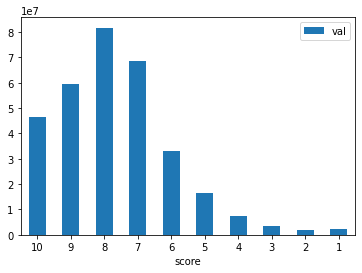

In [130]:
df1 = pd.DataFrame({'score':['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
                   'val':[df['Members score 10'].sum(), df['Members score 9'].sum(),
                          df['Members score 8'].sum(), df['Members score 7'].sum(),
                          df['Members score 6'].sum(), df['Members score 5'].sum(),
                          df['Members score 4'].sum(), df['Members score 3'].sum(),
                          df['Members score 2'].sum(), df['Members score 1'].sum(),]})
ax = df1.plot.bar(x='score', y='val', rot=0)

### Распределение по состоянию просмотра

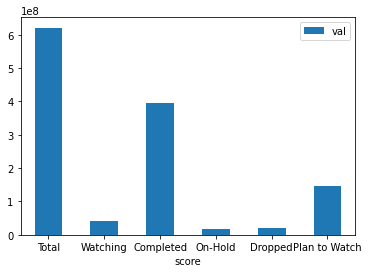

In [131]:
df1 = pd.DataFrame({'score':['Total', 'Watching', 'Completed', 'On-Hold',
                             'Dropped', 'Plan to Watch'],
                   'val':[df['Members Total'].sum(), df['Members Watching'].sum(),
                          df['Members Completed'].sum(), df['Members On-Hold'].sum(),
                          df['Members Dropped'].sum(), df['Members Plan to Watch'].sum()]})
ax = df1.plot.bar(x='score', y='val', rot=0)

In [132]:
df = df.loc[df['Duration'].notna()]
for i in df.index:
    a = []
    for j in str(df.loc[i,'Duration']).split():
        if j.isnumeric():
            a.append(j)
    if len(a) > 1:
        df.loc[i,'Duration'] = int(a[0]) * 60 + int(a[1])
    else:
        df.loc[i,'Duration'] = int(a[0])

In [133]:
df['Time'] = df['Duration'] * df['Episodes']

In [134]:
df['Wasted time'] = df['Time'] * df['Members Completed']

### Время потраченное на просмотр аниме пользователями MyAnimeList в годах

In [135]:
df['Wasted time'].sum()/60/24/365.2425

366421.50228577206

In [136]:
df = pd.read_csv("latest.csv")
del df['Unnamed: 0']
df = df.drop_duplicates()

### Количество выходившего аниме по сезонам

<ipython-input-137-6c0c66a6e274>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1 = pd.Series(index=ind)


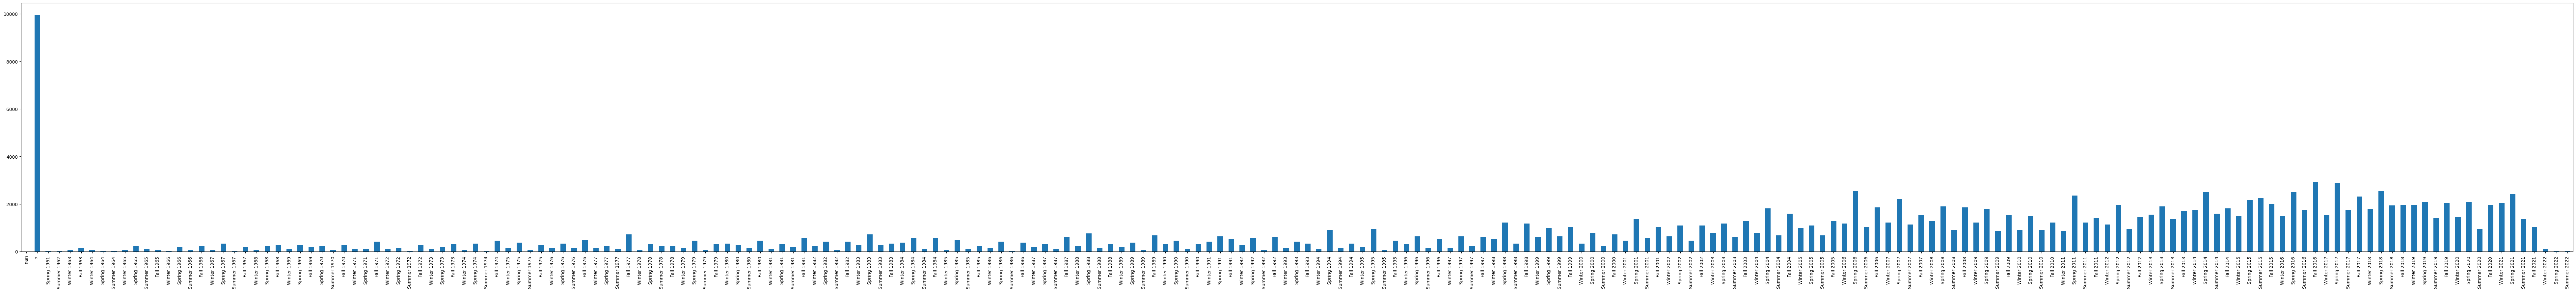

In [137]:
from matplotlib.pyplot import figure

figure(figsize=(100, 10), dpi=100)

def f(s):
    if type(s) == float or s.split()[0] == '?':
        return 0
    s = s.split()
    if s[0] == 'Winter':
        return int(s[1])*10+1
    elif s[0] == 'Spring':
        return int(s[1])*10+2
    elif s[0] == 'Summer':
        return int(s[1])*10+3
    elif s[0] == 'Fall':
        return int(s[1])*10+4
    else:
        print(s)


ind = list(df['Premiered'].unique())
ind.sort(key=f)

df1 = pd.Series(index=ind)

for i in df1.index:
    df1[i] = df.loc[df['Premiered'] == i].size

ax = df1.plot.bar()

In [138]:
df = pd.read_csv("latest.csv")
del df['Unnamed: 0']
df = df.drop_duplicates()
len(df)

17089

In [139]:
for i in df.index:
    s = df.loc[i, 'Premiered']
    if type(s) == float or s.split()[0] == '?':
        df.loc[i, 'Year'] = np.NAN
    else:
        df.loc[i, 'Year'] = s.split()[1]
len(df.loc[df['Year'].notna()])

4543

In [140]:
len(df['Year'].value_counts().loc[df['Year'].value_counts() > 0].index)

62

In [141]:
df = df.loc[df['Year'].notna()]
df = df.loc[df['Year'].isin(list(df['Year'].value_counts().loc[df['Year'].value_counts() > 5].index))]
len(df)

4532

In [142]:
df3 = df.copy()
df3['Members score 10'] = df['Members score 10']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 9'] = df['Members score 9']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 8'] = df['Members score 8']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 7'] = df['Members score 7']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 6'] = df['Members score 6']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 5'] = df['Members score 5']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 4'] = df['Members score 4']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 3'] = df['Members score 3']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 2'] = df['Members score 2']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df3['Members score 1'] = df['Members score 1']  / (df['Members score 10'] + df['Members score 9'] +\
    df['Members score 8'] + df['Members score 7'] + df['Members score 6'] + df['Members score 5'] +\
    df['Members score 4'] + df['Members score 3'] + df['Members score 2'] + df['Members score 1'])
df2 = df.copy()
df = df3.copy()

<Figure size 432x288 with 0 Axes>

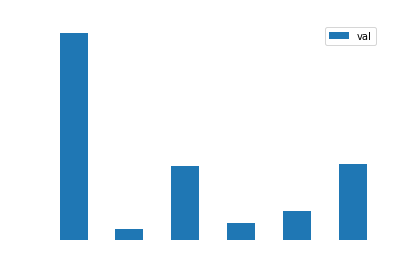

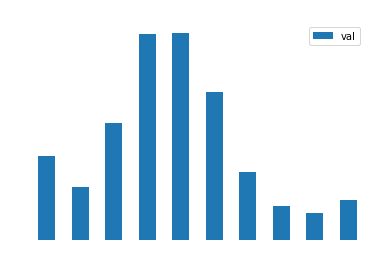

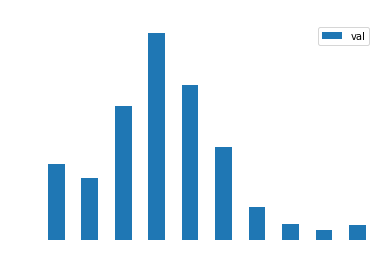

<Figure size 432x288 with 0 Axes>

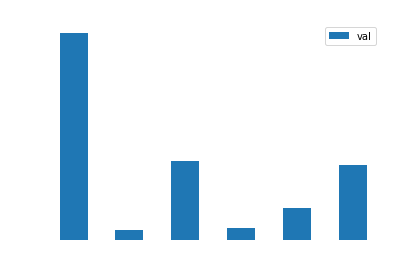

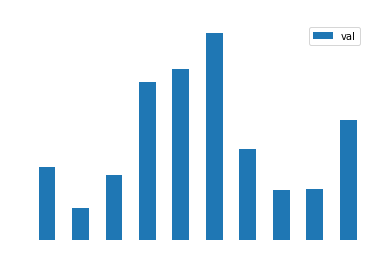

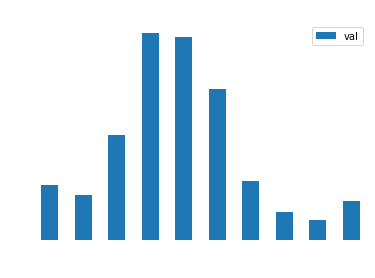

<Figure size 432x288 with 0 Axes>

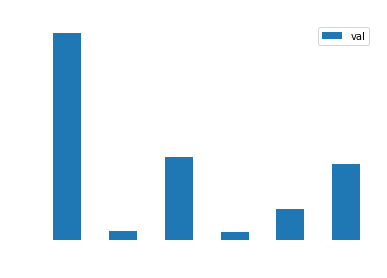

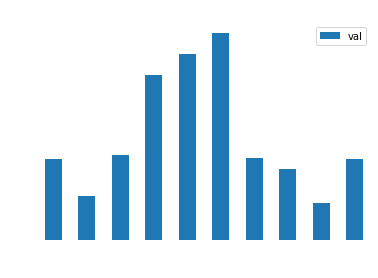

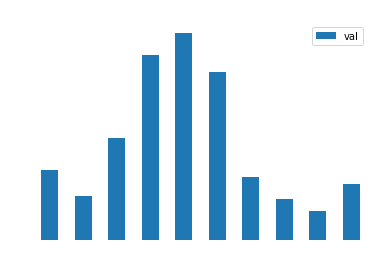

<Figure size 432x288 with 0 Axes>

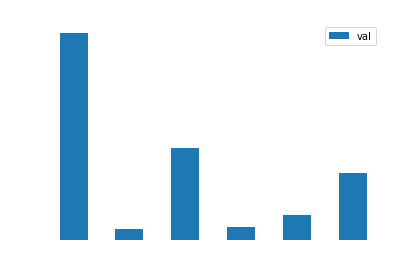

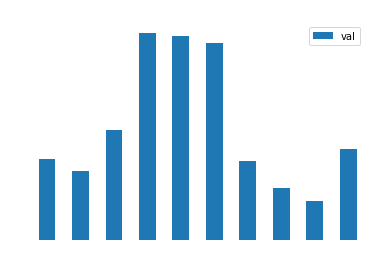

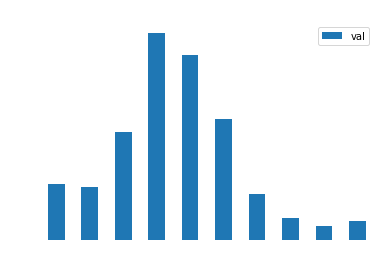

<Figure size 432x288 with 0 Axes>

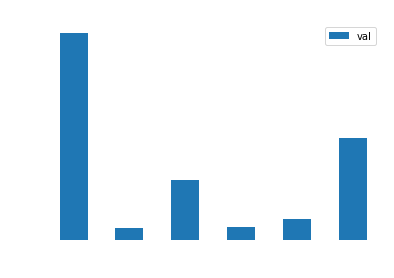

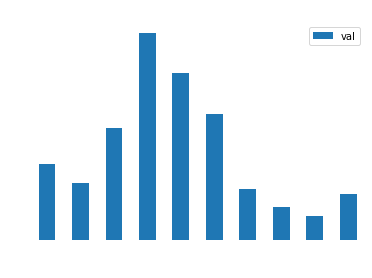

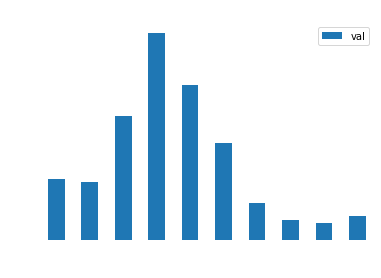

<Figure size 432x288 with 0 Axes>

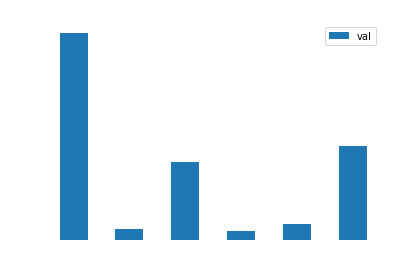

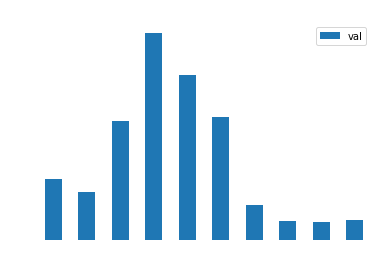

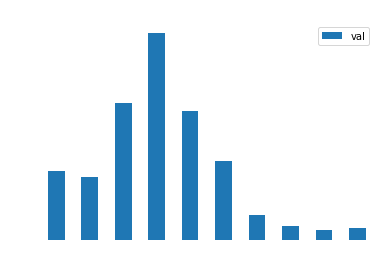

<Figure size 432x288 with 0 Axes>

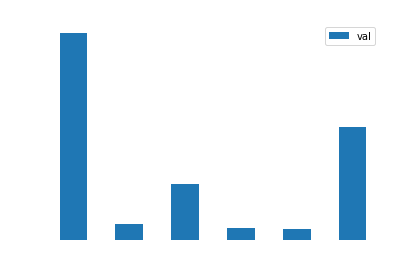

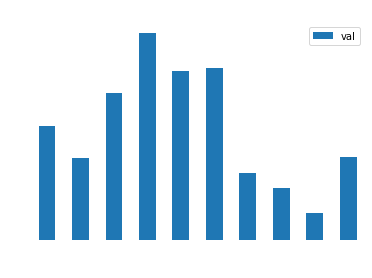

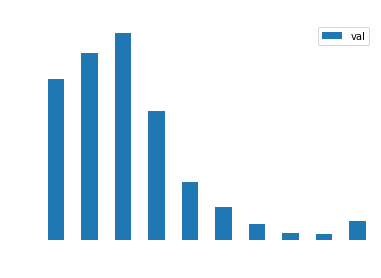

<Figure size 432x288 with 0 Axes>

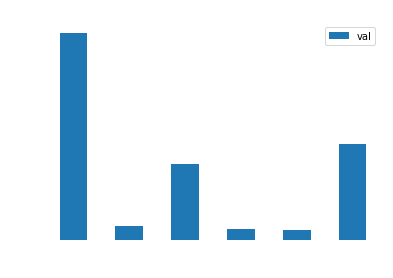

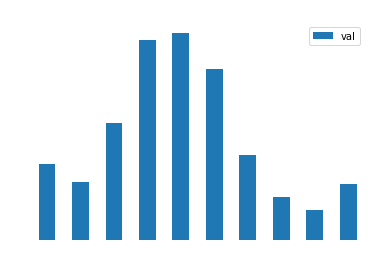

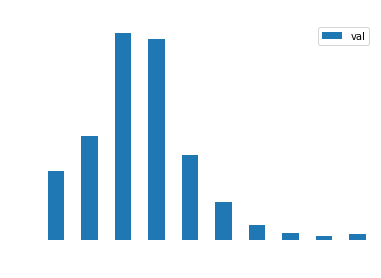

<Figure size 432x288 with 0 Axes>

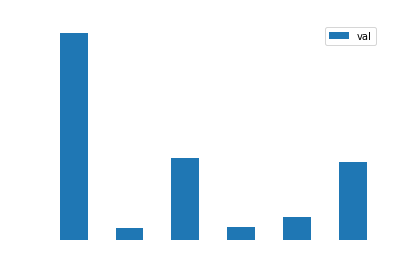

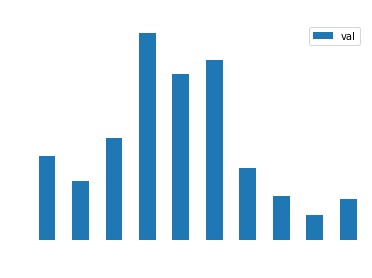

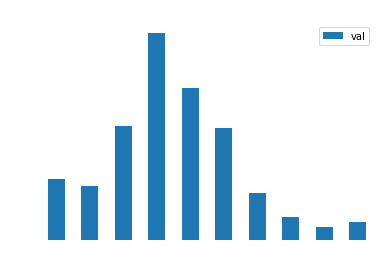

<Figure size 432x288 with 0 Axes>

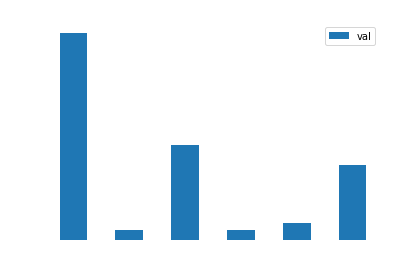

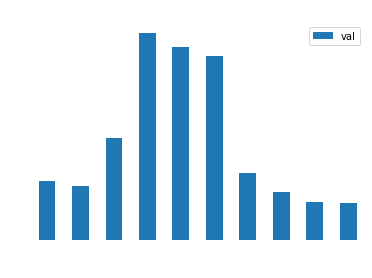

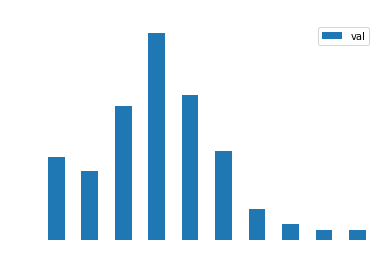

<Figure size 432x288 with 0 Axes>

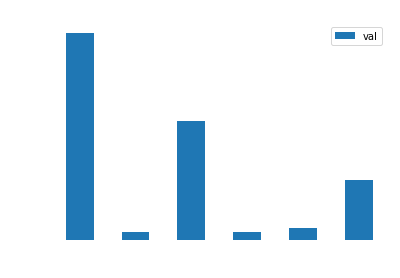

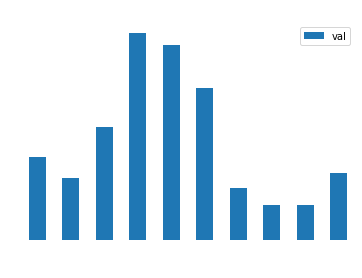

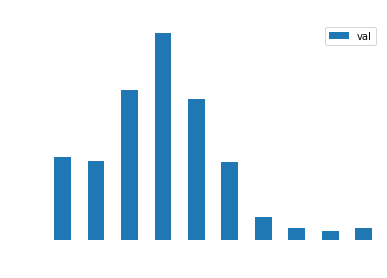

<Figure size 432x288 with 0 Axes>

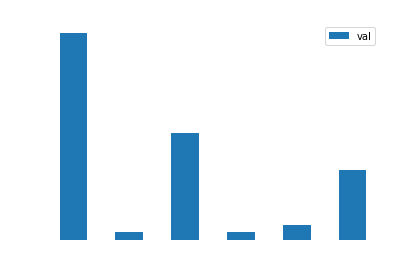

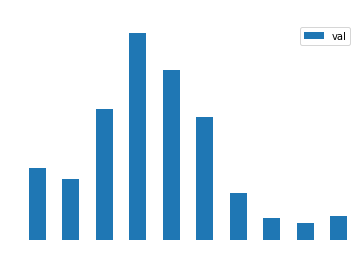

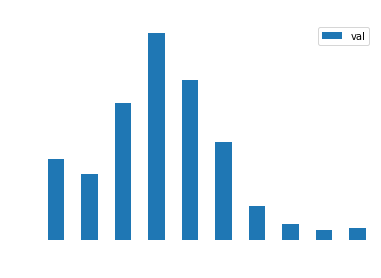

<Figure size 432x288 with 0 Axes>

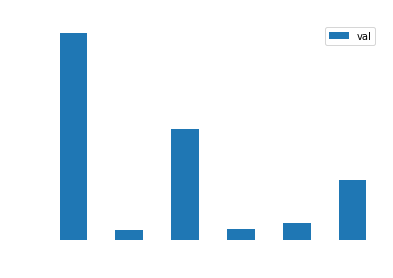

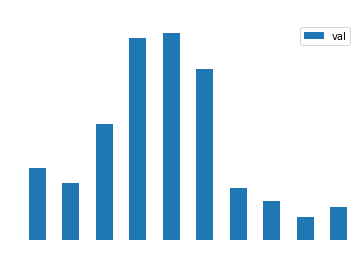

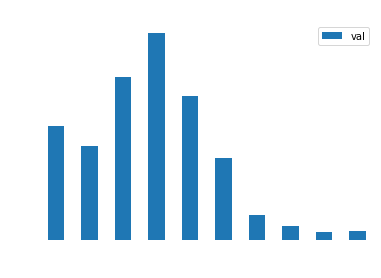

<Figure size 432x288 with 0 Axes>

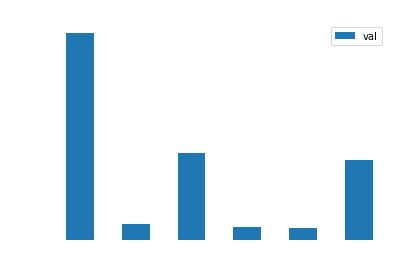

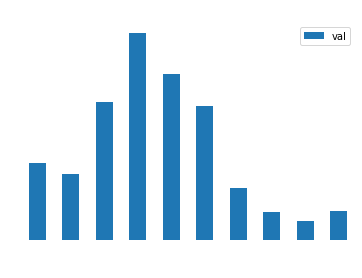

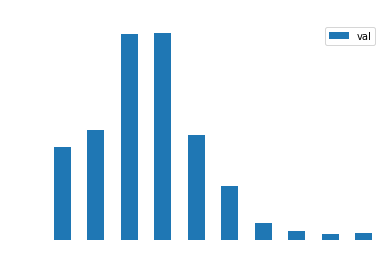

<Figure size 432x288 with 0 Axes>

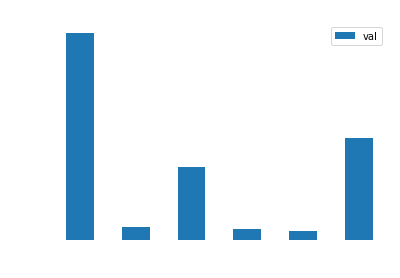

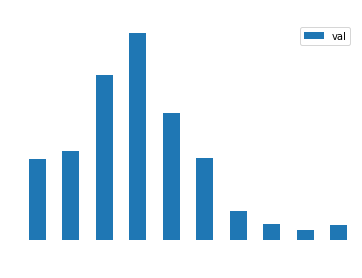

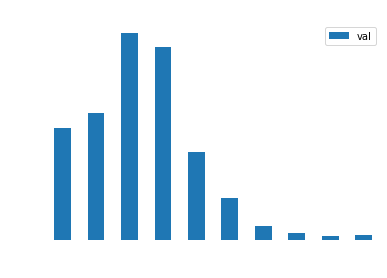

<Figure size 432x288 with 0 Axes>

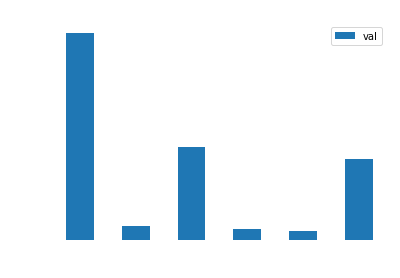

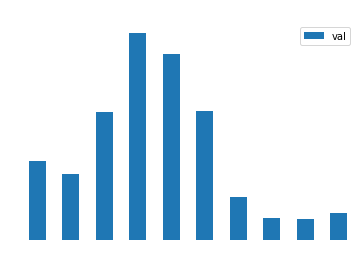

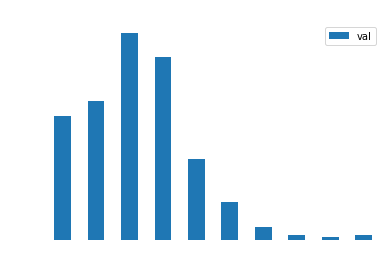

<Figure size 432x288 with 0 Axes>

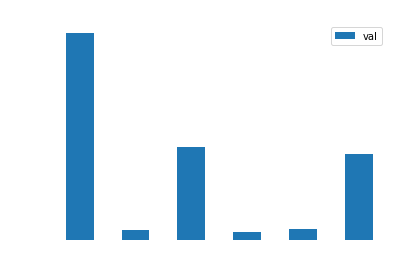

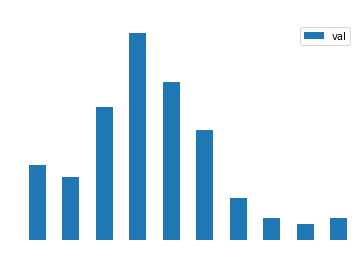

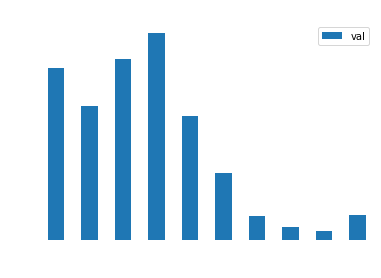

<Figure size 432x288 with 0 Axes>

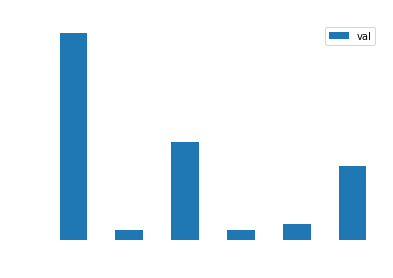

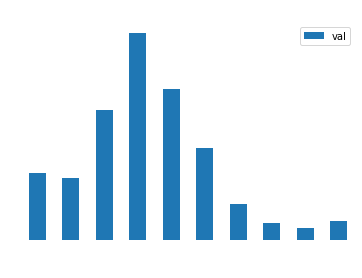

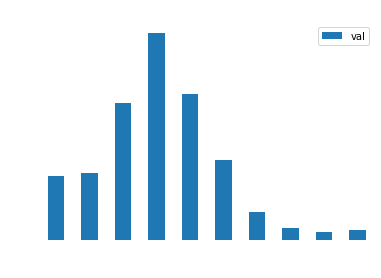

<Figure size 432x288 with 0 Axes>

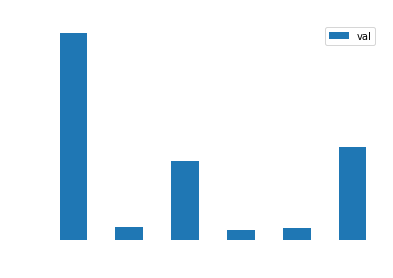

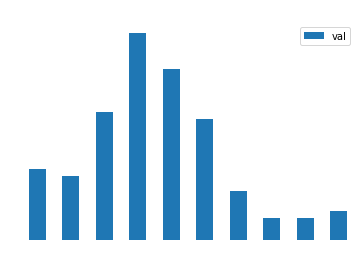

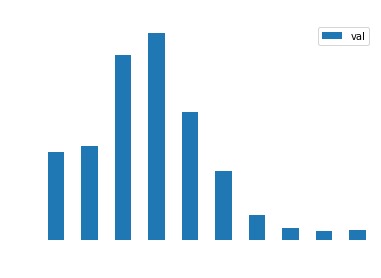

<Figure size 432x288 with 0 Axes>

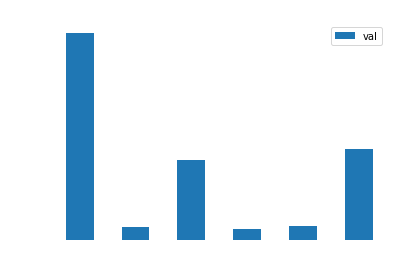

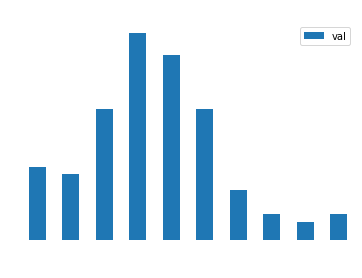

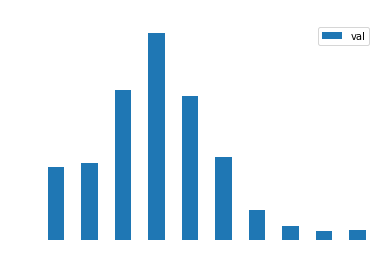

<Figure size 432x288 with 0 Axes>

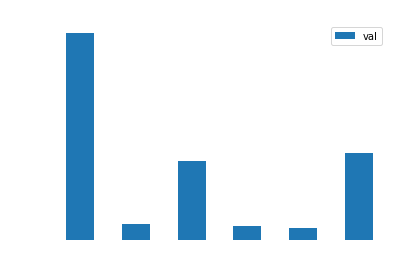

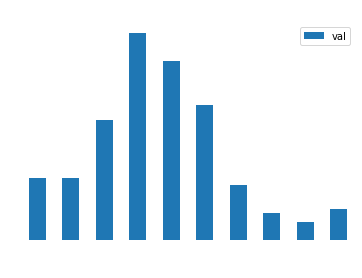

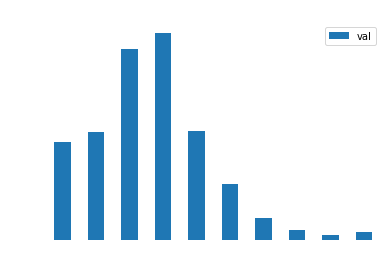

<Figure size 432x288 with 0 Axes>

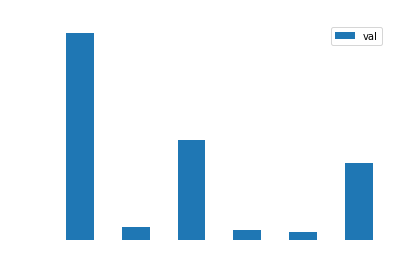

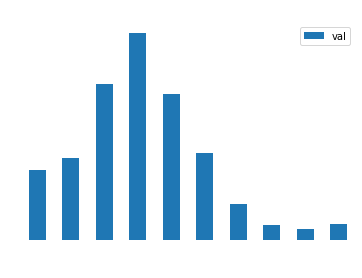

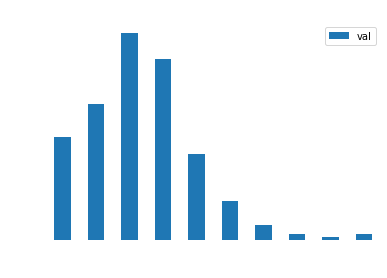

<Figure size 432x288 with 0 Axes>

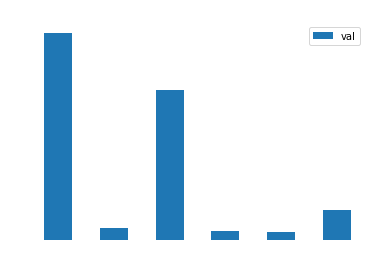

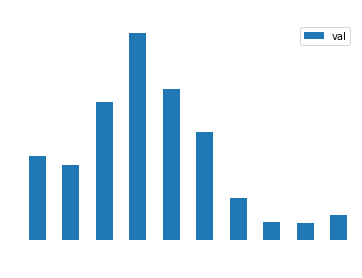

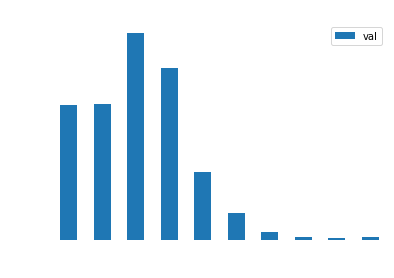

<Figure size 432x288 with 0 Axes>

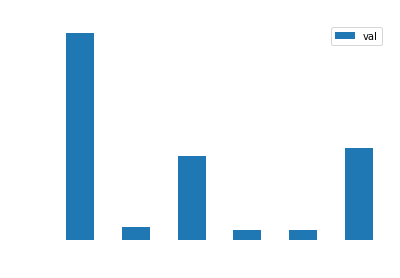

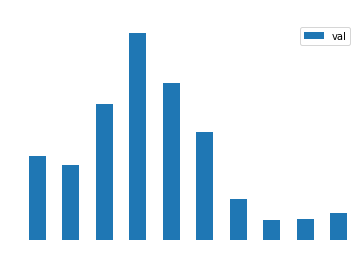

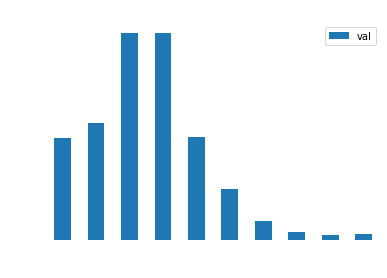

<Figure size 432x288 with 0 Axes>

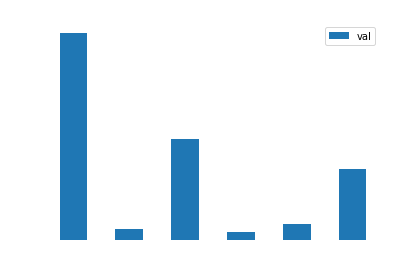

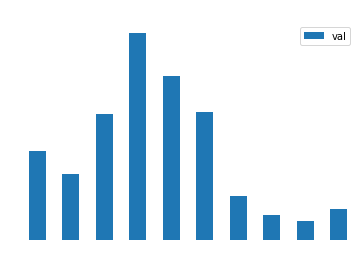

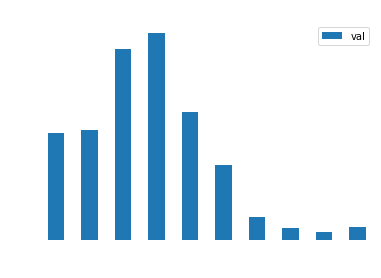

<Figure size 432x288 with 0 Axes>

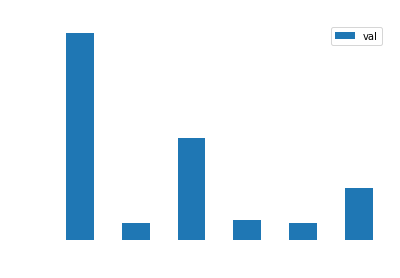

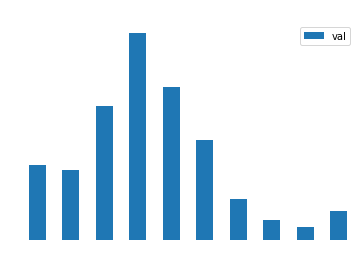

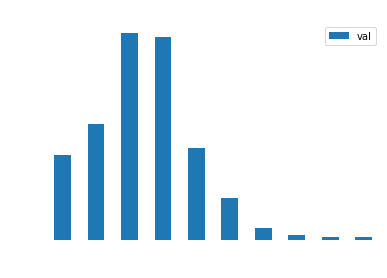

<Figure size 432x288 with 0 Axes>

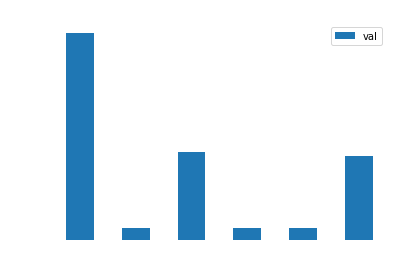

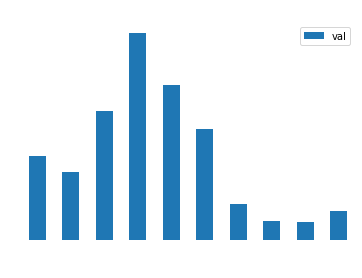

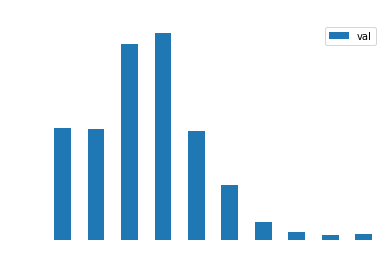

<Figure size 432x288 with 0 Axes>

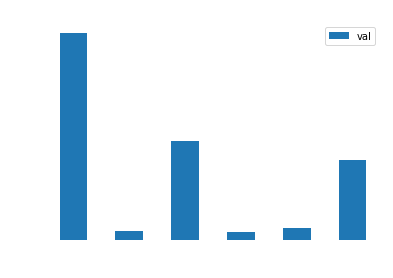

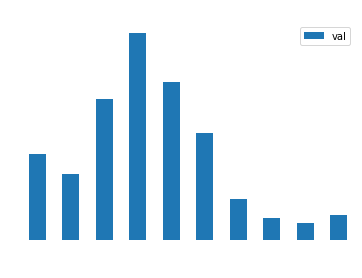

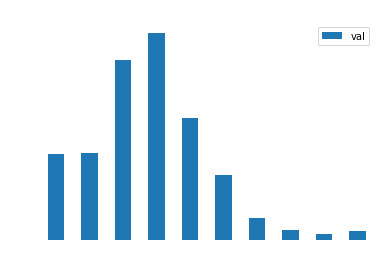

<Figure size 432x288 with 0 Axes>

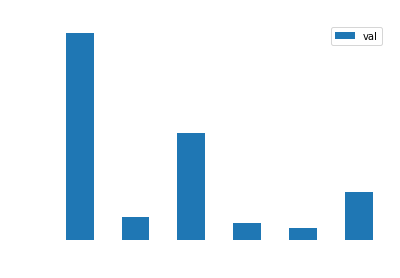

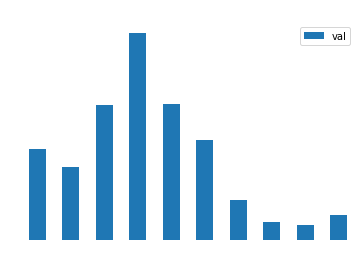

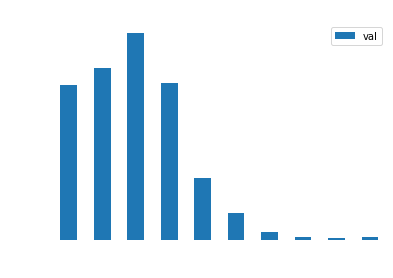

<Figure size 432x288 with 0 Axes>

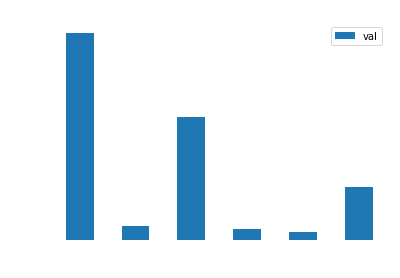

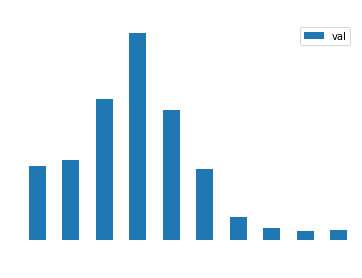

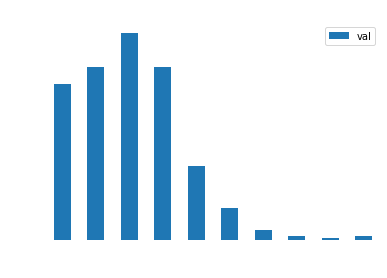

<Figure size 432x288 with 0 Axes>

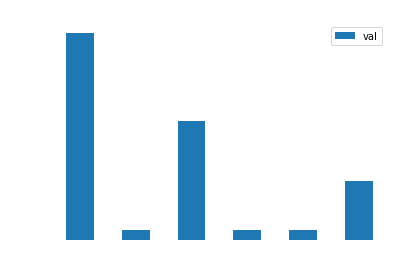

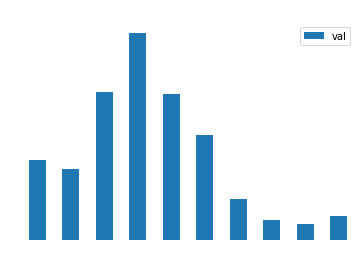

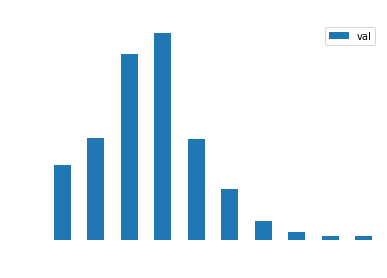

<Figure size 432x288 with 0 Axes>

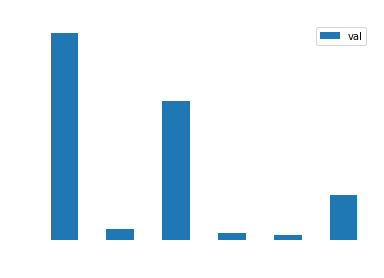

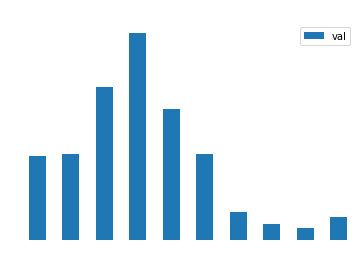

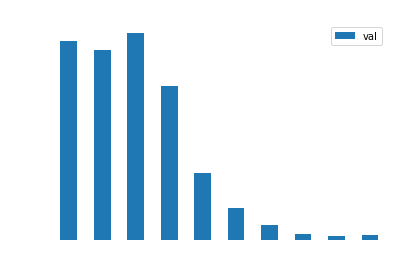

<Figure size 432x288 with 0 Axes>

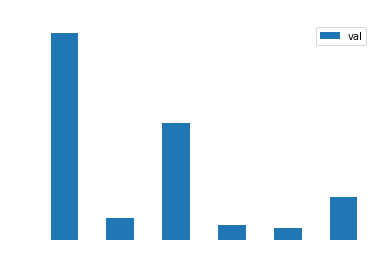

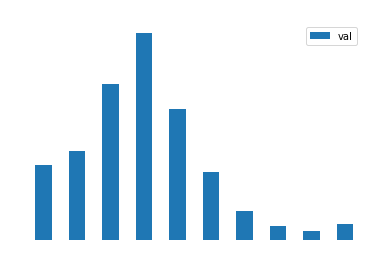

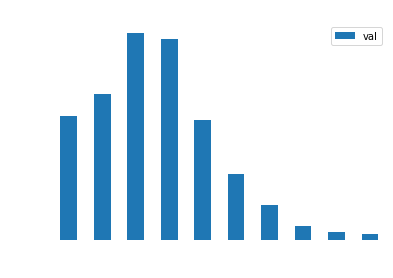

<Figure size 432x288 with 0 Axes>

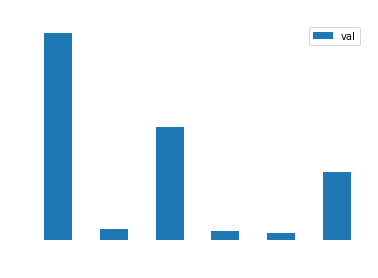

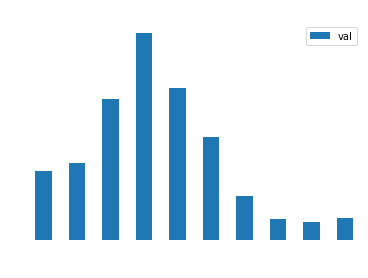

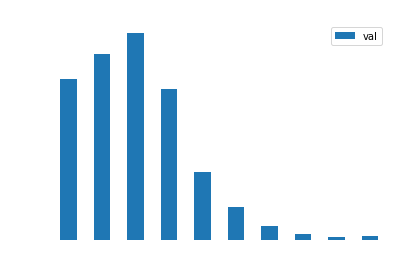

<Figure size 432x288 with 0 Axes>

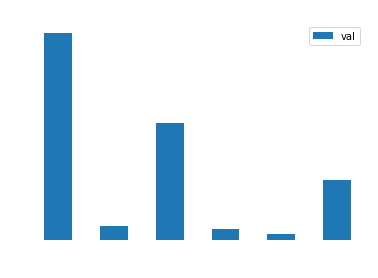

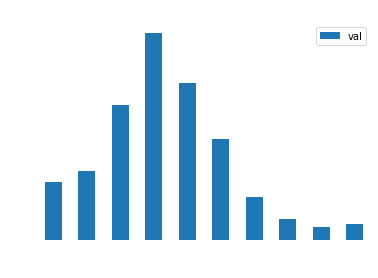

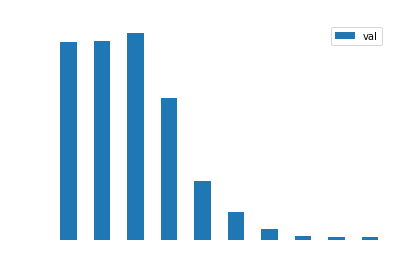

<Figure size 432x288 with 0 Axes>

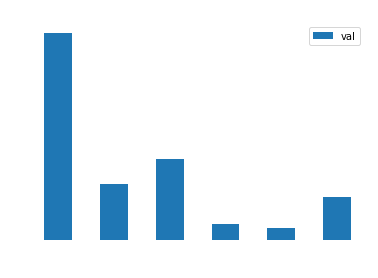

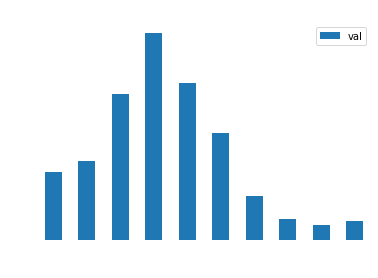

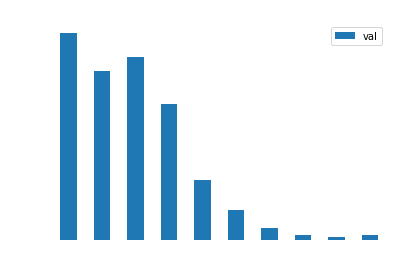

<Figure size 432x288 with 0 Axes>

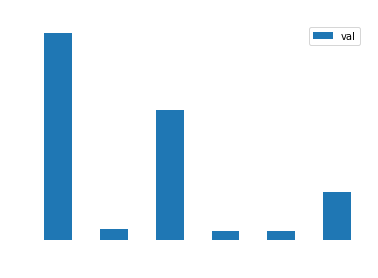

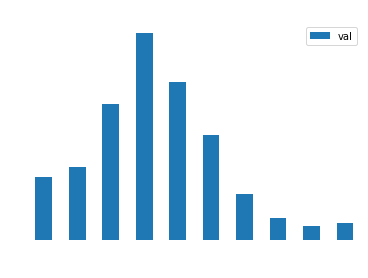

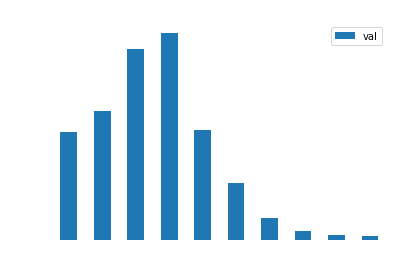

<Figure size 432x288 with 0 Axes>

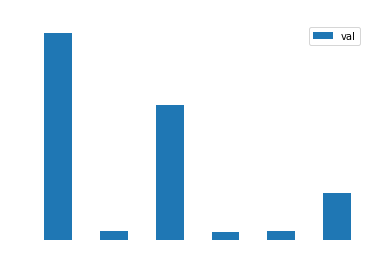

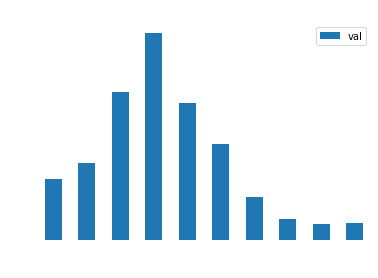

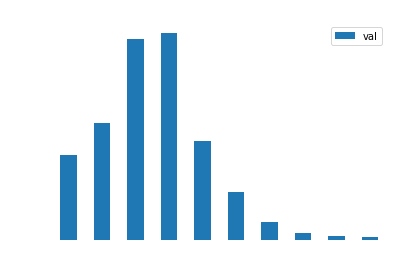

<Figure size 432x288 with 0 Axes>

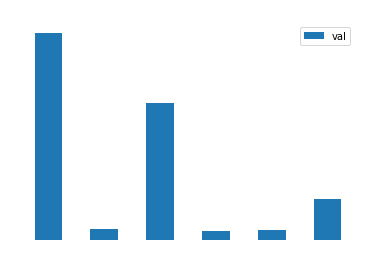

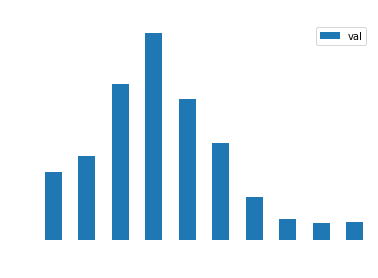

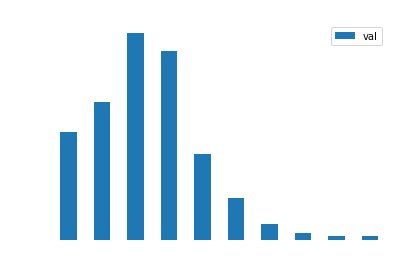

<Figure size 432x288 with 0 Axes>

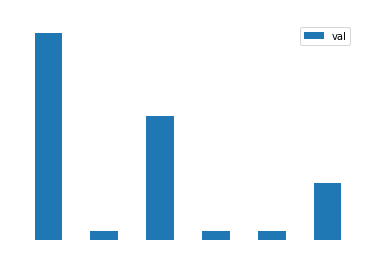

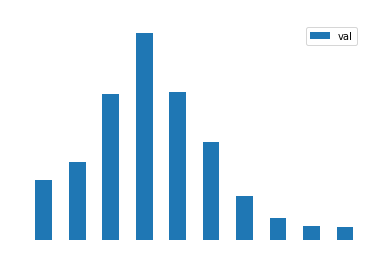

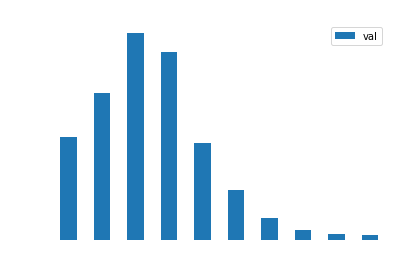

<Figure size 432x288 with 0 Axes>

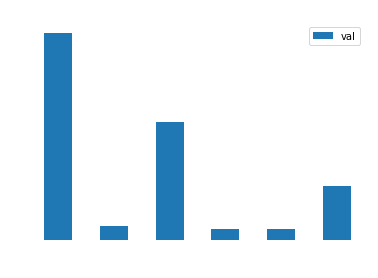

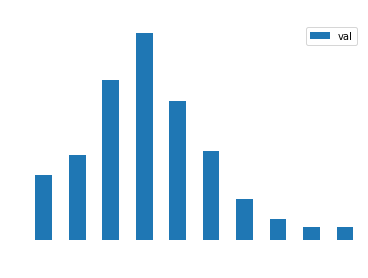

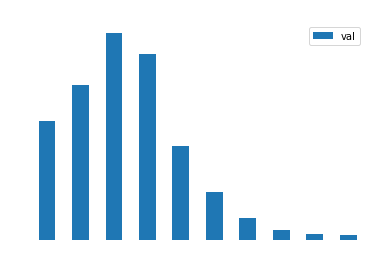

<Figure size 432x288 with 0 Axes>

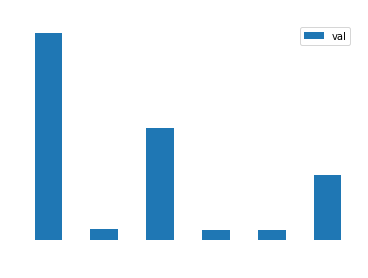

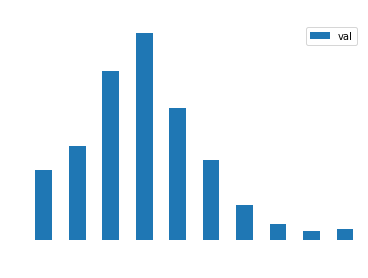

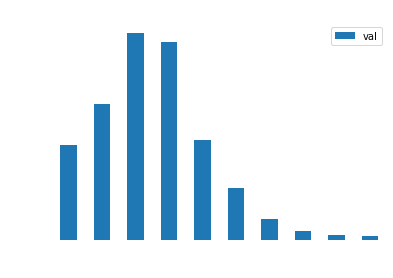

<Figure size 432x288 with 0 Axes>

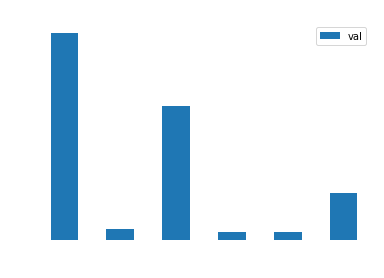

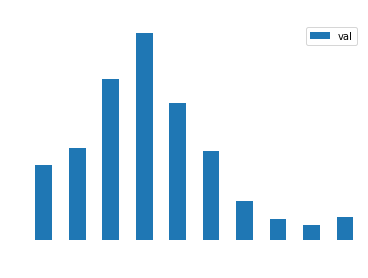

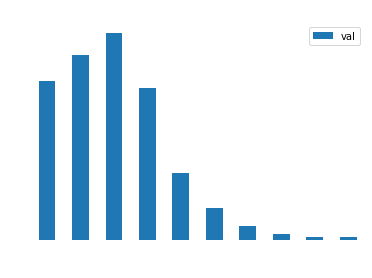

<Figure size 432x288 with 0 Axes>

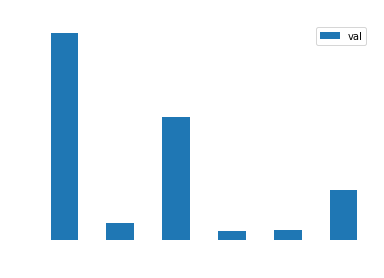

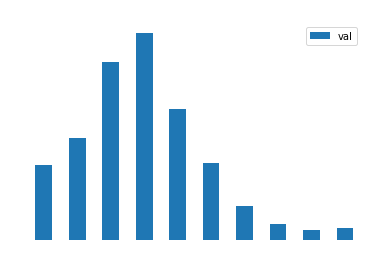

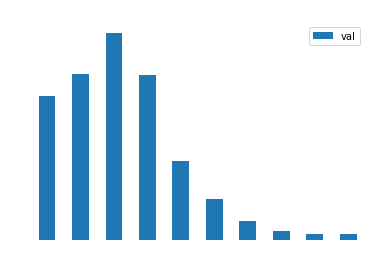

<Figure size 432x288 with 0 Axes>

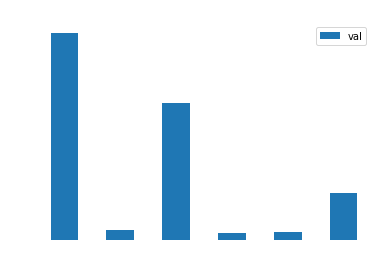

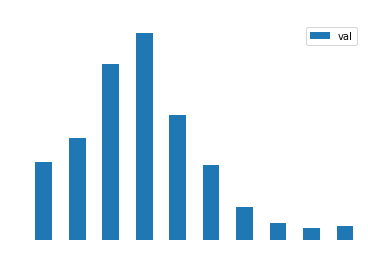

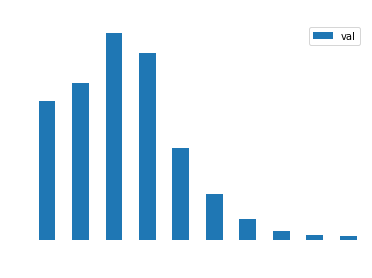

<Figure size 432x288 with 0 Axes>

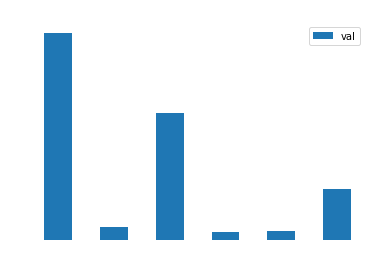

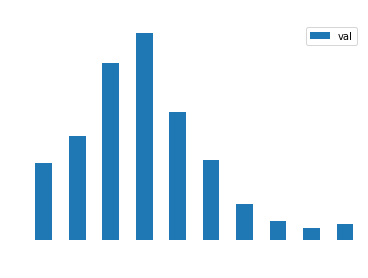

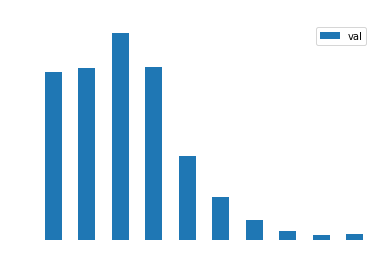

<Figure size 432x288 with 0 Axes>

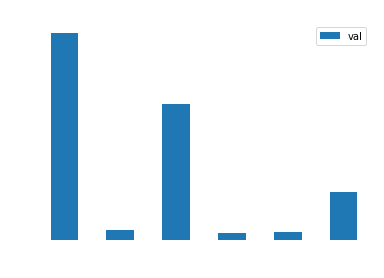

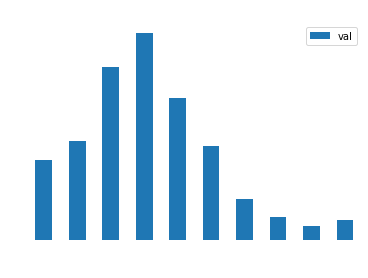

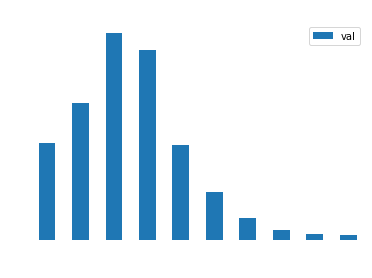

<Figure size 432x288 with 0 Axes>

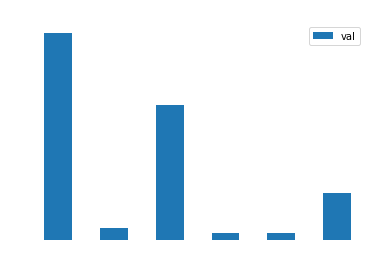

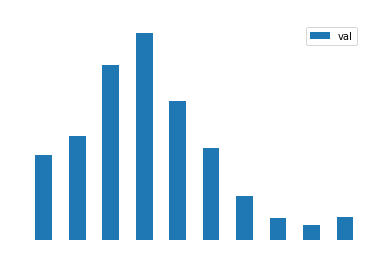

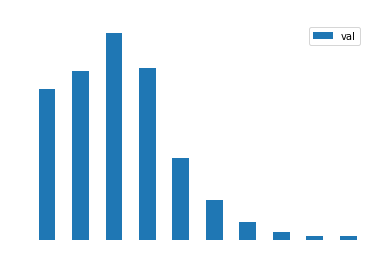

<Figure size 432x288 with 0 Axes>

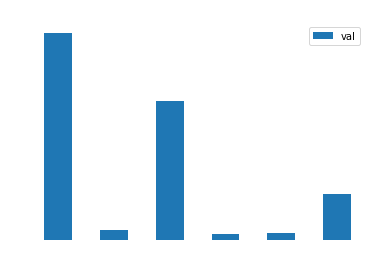

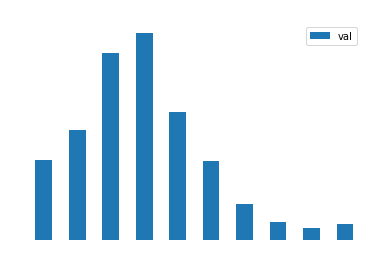

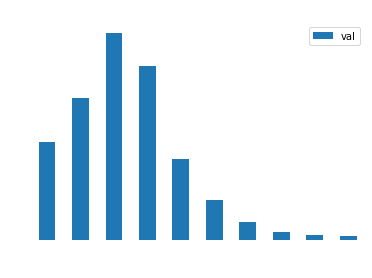

<Figure size 432x288 with 0 Axes>

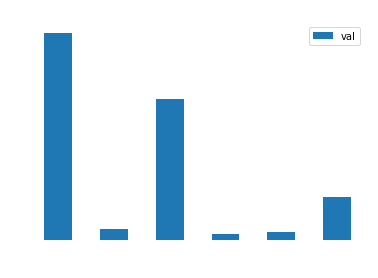

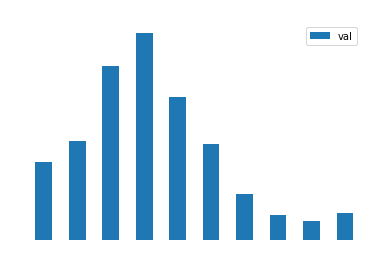

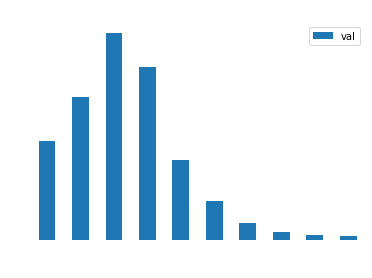

<Figure size 432x288 with 0 Axes>

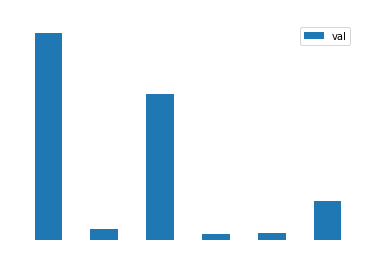

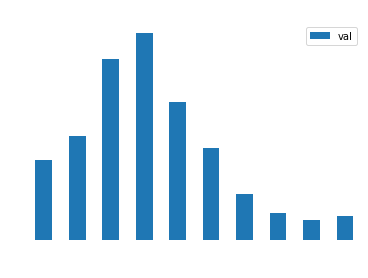

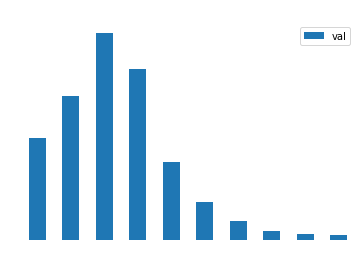

<Figure size 432x288 with 0 Axes>

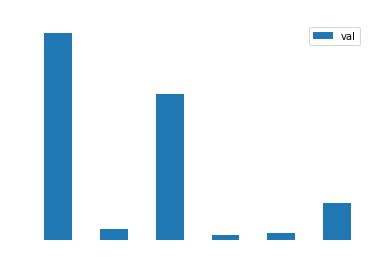

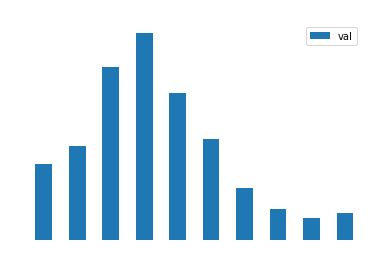

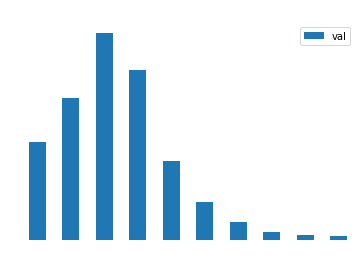

<Figure size 432x288 with 0 Axes>

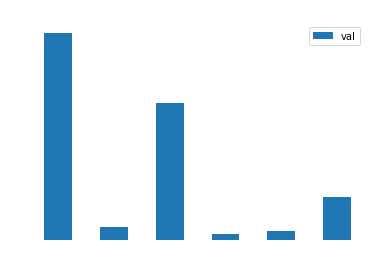

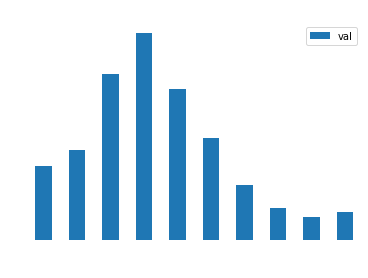

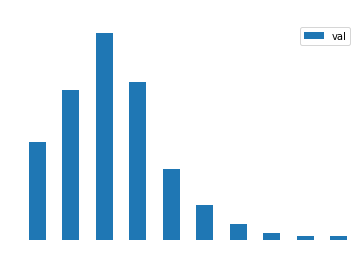

<Figure size 432x288 with 0 Axes>

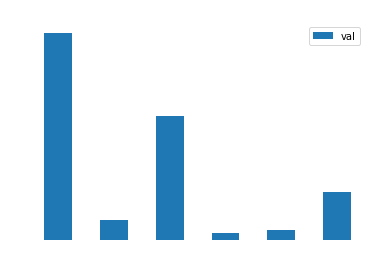

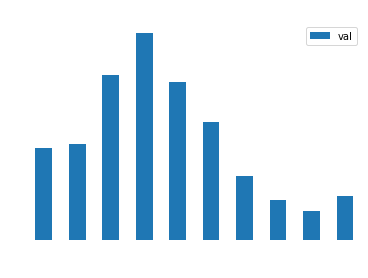

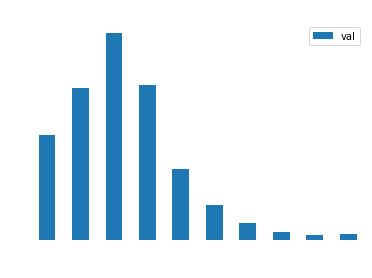

<Figure size 432x288 with 0 Axes>

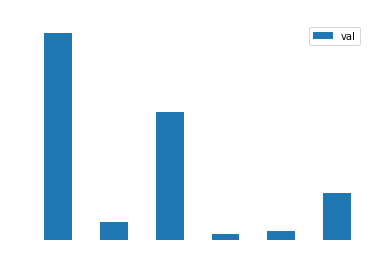

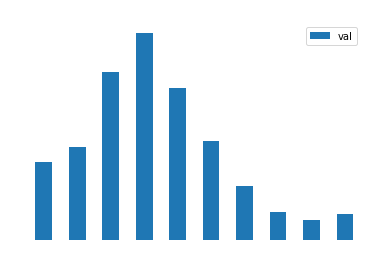

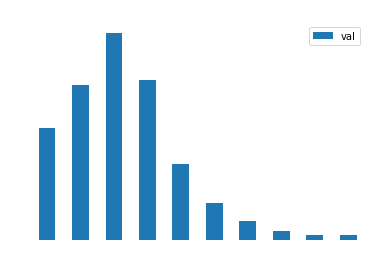

<Figure size 432x288 with 0 Axes>

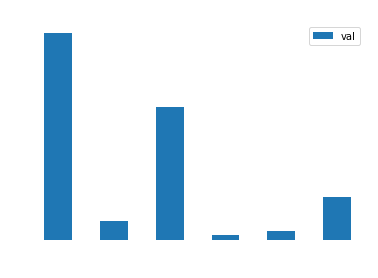

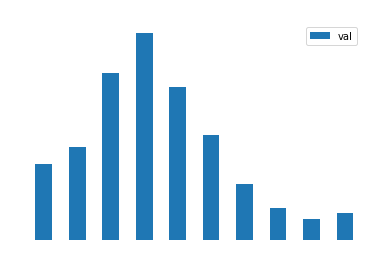

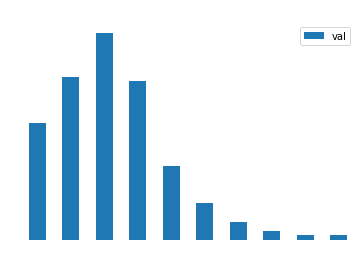

<Figure size 432x288 with 0 Axes>

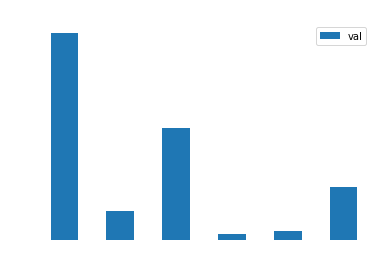

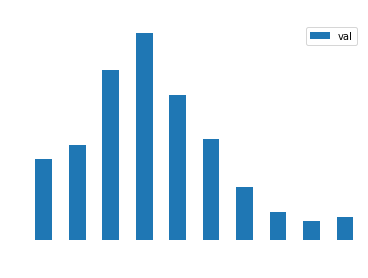

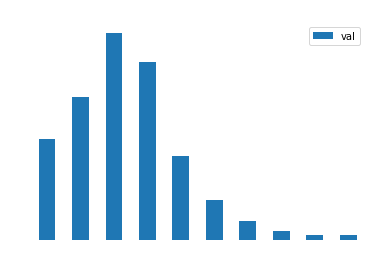

<Figure size 432x288 with 0 Axes>

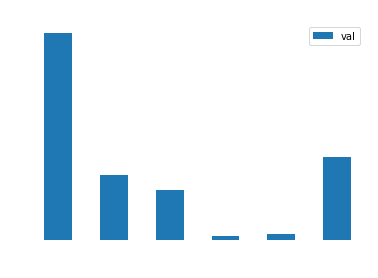

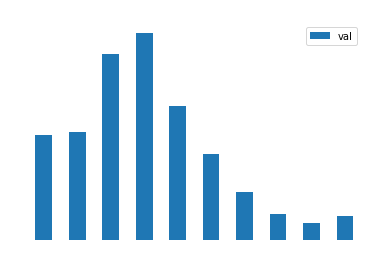

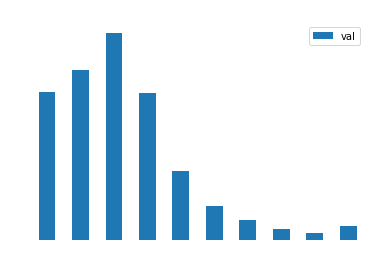

In [154]:
for i in sorted(df2['Year'].unique()):
    params = {"ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w"}
    plt.rcParams.update(params)
    df = df3.loc[df3['Year'] == i]
    fig = plt.figure()
    df1 = pd.DataFrame({'Status':['Total', 'Watching', 'Completed', 'On-Hold',
                                 'Dropped', 'Plan to Watch'],
                       'val':[df['Members Total'].sum(), df['Members Watching'].sum(),
                              df['Members Completed'].sum(), df['Members On-Hold'].sum(),
                              df['Members Dropped'].sum(), df['Members Plan to Watch'].sum()]})
    ax = df1.plot.bar(x='Status', y='val', rot=0)
    ax.set_title(f'{i} Распределение состояний', color='w')
    plt.show()
    df1 = pd.DataFrame({'Score':['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
                   'val':[df['Members score 10'].sum(), df['Members score 9'].sum(),
                          df['Members score 8'].sum(), df['Members score 7'].sum(),
                          df['Members score 6'].sum(), df['Members score 5'].sum(),
                          df['Members score 4'].sum(), df['Members score 3'].sum(),
                          df['Members score 2'].sum(), df['Members score 1'].sum(),]})
    ax = df1.plot.bar(x='Score', y='val', rot=0)
    ax.set_title(f'{i} Уравновешивание аниме', color='w')
    plt.show()
    df = df2.loc[df3['Year'] == i]
    df1 = pd.DataFrame({'Score':['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
                   'val':[df['Members score 10'].sum(), df['Members score 9'].sum(),
                          df['Members score 8'].sum(), df['Members score 7'].sum(),
                          df['Members score 6'].sum(), df['Members score 5'].sum(),
                          df['Members score 4'].sum(), df['Members score 3'].sum(),
                          df['Members score 2'].sum(), df['Members score 1'].sum(),]})
    ax = df1.plot.bar(x='Score', y='val', rot=0)
    ax.set_title(f'{i} По колличеству оценок', color='w')
    plt.show()

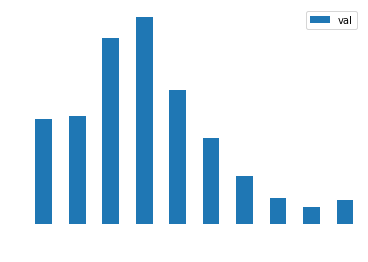

In [147]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
df1 = pd.DataFrame({'score':['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
                   'val':[df['Members score 10'].sum(), df['Members score 9'].sum(),
                          df['Members score 8'].sum(), df['Members score 7'].sum(),
                          df['Members score 6'].sum(), df['Members score 5'].sum(),
                          df['Members score 4'].sum(), df['Members score 3'].sum(),
                          df['Members score 2'].sum(), df['Members score 1'].sum(),]})
ax = df1.plot.bar(x='score', y='val', rot=0)